In [1]:
from numpy import sin, cos, zeros, linspace
from pylab import imshow, show, plot, title
from math import pi, sqrt

print('Librerias')

Librerias


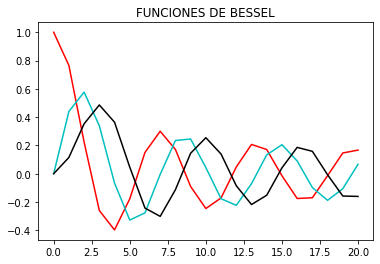

In [2]:
def f(x,m,th):
  return cos(m*th - x*sin(th))

n = 1000
a = 0
b = pi
h = (b - a)/n

j = zeros([21,3],float)
p = []
for pnt in range(21): #Puntos del Eje X
  p.append(pnt)

for m in range(3):#Variacion de la matriz para J0, J1 y J2

  for x in range(21):#Variacion de la matriz para X de 0 a 20

    s = f(x,m,a) + f(x,m,b)

    for k in range(1, n, 2):
      s+=(4*f(x,m,a+(k*h)))

    for i in range(2,n,2):
      s+=(2*f(x,m,a+(i*h)))

    s =(h*s)/(3*pi)
    j[x,m] = s #Valores para cada función de Bessel en X

plot(p,j[:,0],'-r')
plot(p,j[:,1],'-c')
plot(p,j[:,2],'-k')
title('FUNCIONES DE BESSEL')
show()

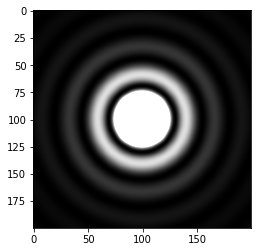

In [3]:
def f(kr,th):
  return cos(th - kr*sin(th))

n = 200
a = 0
b = pi
h = (b - a)/n

la = 500e-9 #Longitud de onda
kp = (2*pi)/la #Constante k

rx = linspace(-1e-6, 1e-6, n) #Coordenadas X de los pixeles
ry = linspace(-1e-6, 1e-6, n) #Coordenadas y de los pixeles

I = zeros([n, n], float)

for y in range(n):
  for x in range(n):
    r = sqrt(rx[x]**2 + ry[y]**2) #Variación del radio
    kr = kp*r
    j1 = f(kr, a)+f(kr, b)

    for k in range(1, n, 2):
      j1+=(4*f(kr, a+(k*h)))

    for i in range(2, n, 2):
      j1+=(2*f(kr, a+(i*h)))
    
    j1 =(h*j1)/(3*pi)

    if kr == 0:
      I[x,y] = (1/2)**2 #Condicional para punto central
    else:
      I[x,y] = (j1/kr)**2

imshow(I, cmap="gray", vmax=0.005)